### EDA on stream numbers
### Questions to answer:
<u>1) Does featuring another artist on a track correlate to higher stream numbers?</u><br>
<b>Yes, featuring an artist on a track will lead to higher stream numbers.</b>

<u>2) What kind of growth in stream numbers has Spotify achieved over the past two years?</u>
<br/><b>On average, daily stream numbers grew by approximately ~8700 streams month over month.</b><br>
<b>ie. taking the average daily stream numbers in a month, we see that the average daily stream numbers grew by ~8700 MoM</b>


<u>3) What does the distribution of stream numbers look like for the top 200 stream list?</u>
<br/><b>The distribution of stream numbers among the top 200 artist list appears to be exponential.</b>
<br/><b>Furthermore, we observe that the log distribution of artist stream numbers appears to be normally distributed.</b>

<u>4) When do Spotify users tend to stream the most (day of week, time of year, etc.)?</u>
<br/><b>Weekday: Spotify users tend to stream the most on Saturday.</b>
<br/><b>Month: Spotify users tend to stream the most in December.</b>
<br/><b>There is likely a high correlation between vacation time and stream numbers however further data and EDA would be required to confirm.</b>

<u>5) Who is the most popular artist/song in the last 2 years years?</u>
<br/><b>Most popular artist: Post Malone</b>
<br/><b>Most popular song: Shape of you - Ed Sheeran.</b>

<u>6) What types of genres tend to be on the top 200 charts?</u>
<br/><b>The top 10 most popular genres among the top 200 song list is as follows:</b>

<br/><b>Pop - 268</b>
<br/><b>Dance Pop - 154</b>
<br/><b>Rap - 103</b>
<br/><b>Pop Rap - 101</b>
<br/><b>Post-teen Pop - 92</b>
<br/><b>Trap Music - 76</b>
<br/><b>Tropical house - 71</b>
<br/><b>Hip Hop - 66</b>
<br/><b>Electronic Dance Music - 53</b>
<br/><b>Latin - 53</b>


In [1]:
#importing modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy import stats
import random
import datetime
import pandas.plotting._converter as pandacnv
from sklearn import linear_model
import pickle
import csv
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from Data_Wrangling.API_KEYS import grab_api_keys
from collections import defaultdict
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
pandacnv.register()
sns.set()
sns.set_style("darkgrid")


In [2]:
cwd = os.getcwd()

In [3]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Capstone1_Analysis_of_top_200_Spotify.pdf',
 'clustering',
 'Data Story',
 'Data_Wrangling',
 'Exploratory Data Analysis - Spotify Top 200 Stream Data.ipynb',
 'Genre_analysis.ipynb',
 'Milestone_Report.docx',
 'README.md',
 'song_analysis_graphs.ipynb',
 'song_genres.ipynb',
 'Statistical_methods',
 'Streams_Over_Time.ipynb',
 'Untitled.ipynb',
 '__pycache__',
 '~$lestone_Report.docx']

In [4]:
csv_path = os.getcwd() + '\\Data_Wrangling\\Top_200_Spotify_Data\\'

In [5]:
def csv_amalgimation(filename):
    csv_df = pd.read_csv(filename, encoding="latin1", parse_dates=[5])
    columns = ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date']
    csv_df.columns = columns
    return csv_df

In [6]:
csv_list = []
for subdir, dirs, files in os.walk(csv_path):
    for file in files:
        csv_list.append(os.path.join(subdir, file))

In [7]:
dfs_to_append = []
error_csvs = []
for csv in csv_list:
    try:
        dfs_to_append.append(csv_amalgimation(csv))
    except:
        error_csvs.append(csv)
        pass

In [8]:
df = pd.DataFrame()
df = df.append(dfs_to_append, ignore_index=True)

In [9]:
#C:\Users\abels\Desktop\spotify_scrape\Data\csv_files\
df.to_csv(cwd + '\\Data_Wrangling\\final_csv_files\\Combined_Top_200_Stream_Numbers.csv')

In [10]:
print (df.shape)
df.head()

(170046, 6)


,Position,Track Name,Artist,Streams,URL,Date
0,Position,Track Name,Artist,Streams,URL,2017-01-01
1,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01


In [11]:
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')

In [12]:
df['Streams'].dtype

dtype('float64')

In [13]:
df['Streams'].head()

0          NaN
1    3135625.0
2    3015525.0
3    2545384.0
4    2356604.0
Name: Streams, dtype: float64

In [14]:
mask = (~np.isnan(df['Streams']))

In [15]:
mask.shape

(170046,)

In [16]:
mask.head()

0    False
1     True
2     True
3     True
4     True
Name: Streams, dtype: bool

In [17]:
df.shape

(170046, 6)

In [18]:
df = df[mask]

In [19]:
df.shape

(169200, 6)

In [20]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01


## 1) Does featuring another artist lead to higher stream numbers?

In [21]:
#Looking through a few of the csv files, Spotify signifies that an artist is featuring someone when the title
#of the song has the keywords "feat" or "with".

#regex to find songs that feature another artist
#df['is_featured'] = df['is_featured'].replace(to_replace=True, value=1, inplace=True, regex=False)
df['is_featured'] = df['Track Name'].str.contains(r'([\(]+feat|[\(]+with)',regex=True)
#df['is_featured'] = df['is_featured'].apply(lambda x: 'featured' if x == 'NaN' else 'Not Featured')
df.head(100)


C:\Users\abels\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,Position,Track Name,Artist,Streams,URL,Date,is_featured
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,False
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,False
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,False
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,True
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,False
6,6,Fake Love,Drake,2137437.0,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-01,False
7,7,24K Magic,Bruno Mars,2111599.0,https://open.spotify.com/track/6b8Be6ljOzmkOmF...,2017-01-01,False
8,8,Don't Wanna Know,Maroon 5,2107137.0,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2017-01-01,False
9,9,Black Beatles,Rae Sremmurd,2075732.0,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-01,False
10,10,I Feel It Coming,The Weeknd,1949575.0,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,False


In [229]:
#Groupging artist by how often they feature another artist
is_featured_pivot = df.groupby(['Artist','is_featured'])['Track Name'].count().to_frame(name='count').reset_index()

is_featured_pivot = pd.pivot_table(is_featured_mean, values=['count'], index=['Artist'], columns=['is_featured'], aggfunc=np.sum, fill_value=0)


is_featured_pivot.reset_index(inplace=True,col_level=1)
is_featured_pivot.columns = is_featured_pivot.columns.droplevel()

is_featured_pivot.columns = ['Artist','not_featured','featured']

is_featured_pivot['%featured'] = is_featured_pivot['featured'] / (is_featured_pivot['not_featured'] + is_featured_pivot['featured'])

is_featured_pivot.sort_values('%featured',ascending=False)

,Artist,not_featured,featured,%featured
515,Orelsan,0,2,1.0
331,KYLE,0,470,1.0
348,Kina,0,3,1.0
350,KitschKrieg,0,9,1.0
695,Vice,0,112,1.0
353,Kris Kross Amsterdam,0,103,1.0
697,Vince Staples,0,20,1.0
508,Normani,0,7,1.0
158,DRAM,0,198,1.0
108,Bushido,0,9,1.0


In [22]:
#determine if a featured song generally has more streams
is_featured_mean = df.groupby('is_featured')['Streams'].mean()
is_featured_mean.index = ['non-featured', 'featured']
is_featured_std = df.groupby('is_featured')['Streams'].std()
is_featured_std.index = ['non-featured', 'featured']

print (is_featured_mean)
print (is_featured_std)

non-featured    1.100355e+06
featured        1.165902e+06
Name: Streams, dtype: float64
non-featured    809467.151141
featured        787310.052788
Name: Streams, dtype: float64


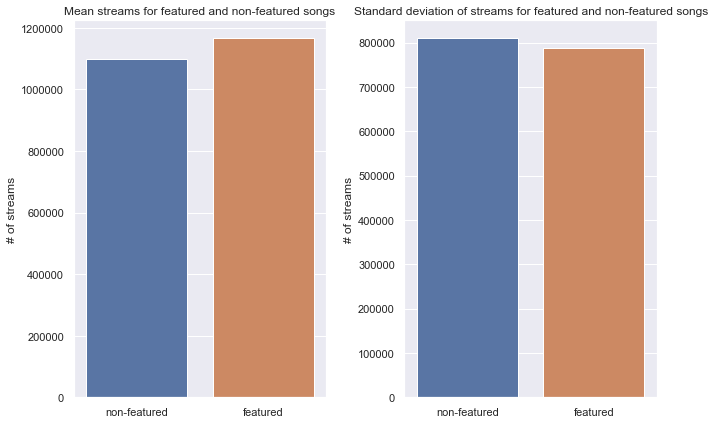

In [23]:
#charting featured vs non-featured
_, axes = plt.subplots(1, 2,figsize=(10,6))
plt.tight_layout(w_pad=4)
_ = sns.barplot(is_featured_mean.index, is_featured_mean,ax=axes[0])
_ = _.set(label='# of streams', title='Mean streams for featured and non-featured songs', ylabel='# of streams')
_ = sns.barplot(is_featured_std.index, is_featured_std,ax=axes[1])
_.set(label='# of streams', title='Standard deviation of streams for featured and non-featured songs', ylabel='# of streams')
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\featuring_mean_sd.png')

In [24]:
#To determine if the means are significantly different, a bootstrap sampling of the means was performed

#loading the songs into numpy arrays
featured_songs = np.array(df['Streams'][df['is_featured']==1])
not_featured_songs = np.array(df['Streams'][df['is_featured']==0])

#calculate the difference in means
difference_in_mean = np.mean(featured_songs) - np.mean(not_featured_songs)

#compute mean stream of both samples
mean_streams = np.mean(np.append(featured_songs, not_featured_songs))
print (mean_streams)

#adjusting the two samples to have the same mean
featured_songs = featured_songs - np.mean(featured_songs) + mean_streams
not_featured_songs = not_featured_songs - np.mean(not_featured_songs) + mean_streams

print (np.mean(featured_songs))
print (np.mean(not_featured_songs))
print ('The difference between the sample means is %s' %difference_in_mean)

1113531.4904186025
1113531.4904186025
1113531.4904186025
The difference between the sample means is 65547.10255772131


In [25]:
#generate replicates for each sample
featured_replicates = np.array([np.random.choice(featured_songs, len(not_featured_songs), replace=True).mean() for x in range(10000)])
not_featured_replicates = np.array([np.random.choice(not_featured_songs, len(not_featured_songs), replace=True).mean() for x in range(10000)])

In [26]:
replicate_differences = featured_replicates - not_featured_replicates
pvalue = np.sum(replicate_differences >= difference_in_mean) / len(replicate_differences)
print (pvalue)

0.0


## With a pvalue of 0, we can reject the null hypothesis that the average stream numbers between songs that feature another artist are higher than those that are not featured.

## 2) What kind of growth in stream numbers has Spotify achieved over the past two years?

In [27]:
#confirming datatype
type(df.iloc[0]['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
#converting timestamp object to datetime
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())

In [29]:
#confirming
type(df.iloc[0]['Date'])
df2 = df

In [30]:
df2 = df2.set_index('Date')
df2.index = pd.to_datetime(df2.index)

In [31]:
df2.head()

,Position,Track Name,Artist,Streams,URL,is_featured
Date,,,,,,
2017-01-01,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,False
2017-01-01,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,False
2017-01-01,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,False
2017-01-01,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,True
2017-01-01,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,False


In [32]:
monthly_resample = df2['Streams'].resample('M').mean().to_frame()
monthly_resample = monthly_resample.reset_index()
monthly_resample.head()
#_, ax = plt.subplots()
#_ = plt.figure(figsize=(12,6))
#ax.set_xticks(monthly_resample.Date)
#_ = sns.regplot(x = 'index', y='Streams', data=monthly_resample, fit_reg=True,x_estimator=np.mean,ci=95).set_title('Average Number of Monthly Streams')


,Date,Streams
0,2017-01-31,9.018520e+05
1,2017-02-28,9.742396e+05
2,2017-03-31,1.133442e+06
3,2017-04-30,1.076219e+06
4,2017-05-31,1.101641e+06


In [33]:
y = monthly_resample['Streams'].values

In [34]:
x = np.arange(0,len(monthly_resample.Date))
asdf = monthly_resample['Streams'].values
print (x)
print (y)

#B = np.reshape(A, (-1, 2))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 901851.99854839  974239.58407407 1133441.80419355 1076218.5595
 1101640.64275862 1069820.91741379 1033330.36741935 1010752.32258065
 1052912.53266667 1028795.04435484 1032530.90416667 1094196.50951613
 1062399.90532258 1098423.24071429 1106824.84967742 1183924.342
 1133321.78612903 1168881.65716667 1183213.08322581 1143511.76129032
 1141657.02916667 1144204.74532258 1159549.5195     1258108.02032258
 1168334.61274194 1284590.10410714 1210521.015      1221156.6675    ]


In [35]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [36]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
intercept = int(round(reg.intercept_[0],0))
coef = int(round(reg.coef_[0][0],0))
equation = str(coef) + 'x + ' + str(intercept)
print(intercept)
print(coef)
print (equation)

996351
8679
8679x + 996351


In [37]:
y_hat = reg.predict(x)
y_hat = y_hat.ravel()
monthly_resample['y_model'] = y_hat

In [38]:
monthly_resample['year-month'] = pd.to_datetime(monthly_resample['Date']).dt.year.apply(str) + '-' + pd.to_datetime(monthly_resample['Date']).dt.month.apply(str)
monthly_resample.head()

,Date,Streams,y_model,year-month
0,2017-01-31,9.018520e+05,9.963513e+05,2017-1
1,2017-02-28,9.742396e+05,1.005030e+06,2017-2
2,2017-03-31,1.133442e+06,1.013709e+06,2017-3
3,2017-04-30,1.076219e+06,1.022387e+06,2017-4
4,2017-05-31,1.101641e+06,1.031066e+06,2017-5


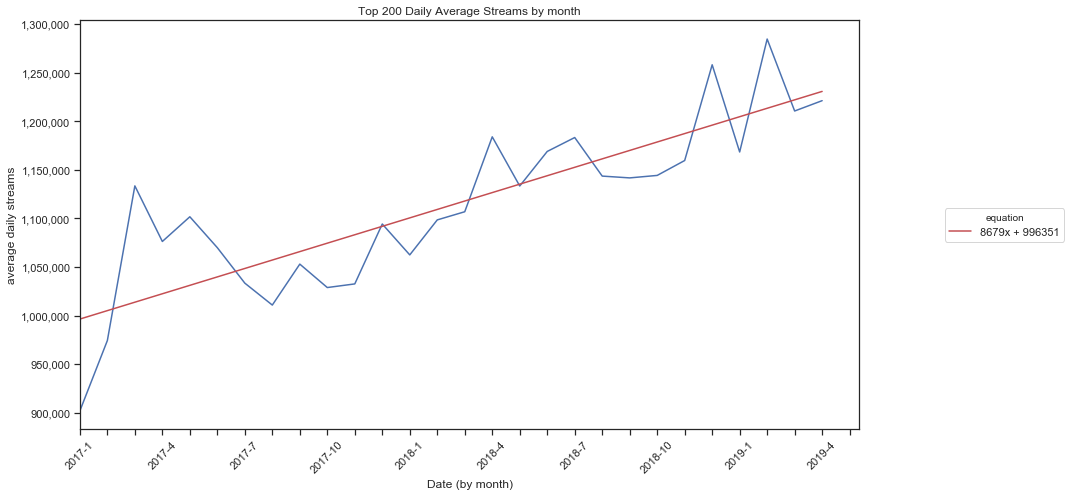

In [39]:
sns.set_style(style='white')
sns.set_style('ticks')
plt.figure(figsize = (15,7))
_ = sns.lineplot(monthly_resample.index, monthly_resample.Streams)
_ = sns.lineplot(monthly_resample.index, monthly_resample.y_model,color='r',label=equation)
_.set(title='Top 200 Daily Average Streams by month', ylabel='average daily streams', xlabel='Date (by month)')
_.set_xlim(xmin=0)
plt.locator_params(axis='x', nbins=30)
_.set_xticklabels([monthly_resample['year-month'][x] if x % 3 == 0 else '' for x in range(len(monthly_resample['year-month']))])
_.set_yticklabels(['{:,}'.format(int(x)) for x in _.get_yticks().tolist()])
plt.xticks(rotation=45)
_ = plt.legend(title='equation', loc='center right', bbox_to_anchor=(1.27, 0.5) )
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\streams_over_time.png')

#### The above plot shows significant growth over time. Between January 2017 and April 2019, the top 200 Spotify chart daily stream numbers grew at an average of ~8700 streams.
#### In other words, the average daily streams in a month grew by ~8700 streams.


## 3) What does the distribution of stream numbers look like for the top 200 stream list? 

In [40]:
top_artists = df.groupby('Artist')['Streams'].sum().reset_index()
top_artists = top_artists.sort_values('Streams', ascending=False)

In [41]:
top_artists['log_streams'] = np.log(top_artists['Streams'])

In [42]:
top_artists.head()

,Artist,Streams,log_streams
544,Post Malone,7.730977e+09,22.768501
198,Ed Sheeran,6.779223e+09,22.637128
191,Drake,6.622569e+09,22.613749
710,XXXTENTACION,5.110401e+09,22.354544
45,Ariana Grande,4.220703e+09,22.163267


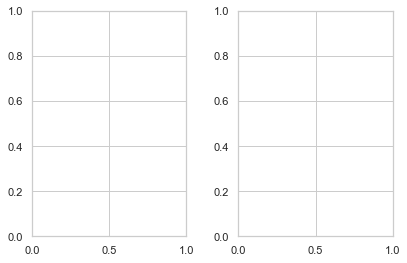

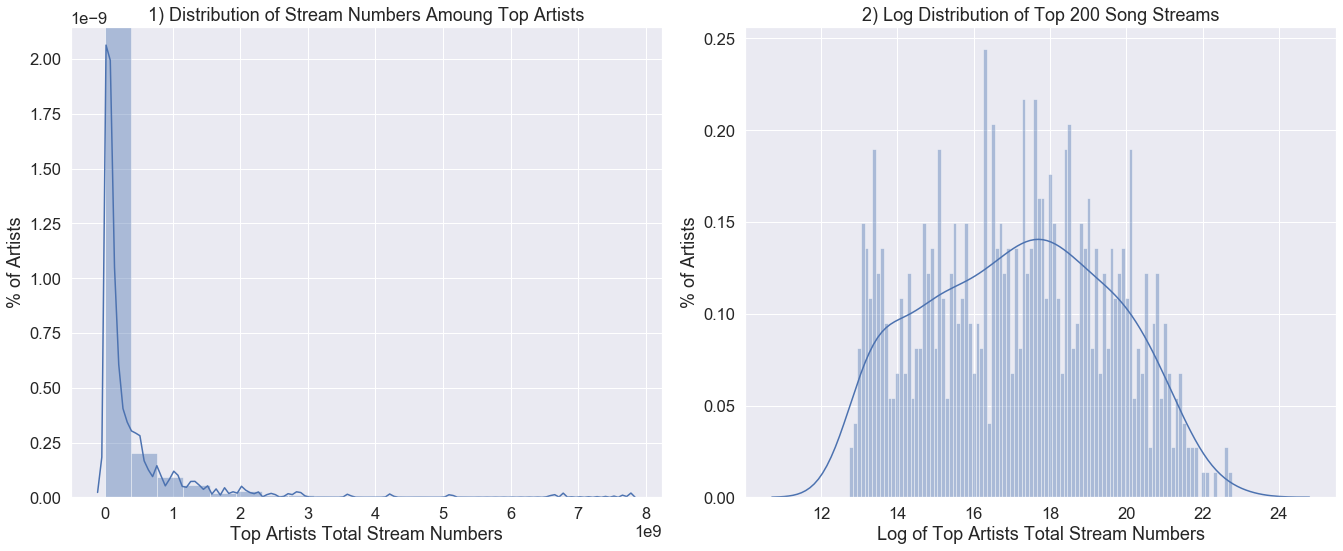

In [43]:
sns.set_style(style='white')
sns.set_style('ticks')


fig = plt.figure()
with sns.axes_style("whitegrid"):
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

_ = sns.set(font_scale=1.5)
_ , ax = plt.subplots(nrows=1, ncols=2, figsize=(19,8))
sns.set_style(style='white')
sns.set_style('ticks')
_ = sns.distplot(top_artists['Streams'], ax=ax[0], bins=20)
_ =_.set(title='1) Distribution of Stream Numbers Amoung Top Artists', ylabel='% of Artists', xlabel='Top Artists Total Stream Numbers')
_ = sns.distplot(top_artists['log_streams'], ax=ax[1],bins=100)
_.set(title='2) Log Distribution of Top 200 Song Streams', ylabel='% of Artists', xlabel='Log of Top Artists Total Stream Numbers')
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\dist_of_songs.png')

In [44]:
top_artists['Streams'].values

array([7.73097656e+09, 6.77922335e+09, 6.62256891e+09, 5.11040136e+09,
       4.22070255e+09, 3.59898112e+09, 2.91161781e+09, 2.85131810e+09,
       2.80482182e+09, 2.69982090e+09, 2.49090436e+09, 2.42445653e+09,
       2.24813552e+09, 2.23993275e+09, 2.13467029e+09, 2.07520172e+09,
       2.03810527e+09, 2.03235265e+09, 2.01032296e+09, 1.93700598e+09,
       1.87932062e+09, 1.79968488e+09, 1.77235818e+09, 1.75061252e+09,
       1.64514757e+09, 1.63729872e+09, 1.54438824e+09, 1.51076260e+09,
       1.50324764e+09, 1.47400476e+09, 1.42973514e+09, 1.37643454e+09,
       1.36204260e+09, 1.34954363e+09, 1.34932159e+09, 1.33965434e+09,
       1.28865722e+09, 1.28295743e+09, 1.24665604e+09, 1.24458598e+09,
       1.23472084e+09, 1.21422458e+09, 1.13770330e+09, 1.12768981e+09,
       1.09528079e+09, 1.07025158e+09, 1.06839526e+09, 1.05719050e+09,
       1.05102206e+09, 1.04813691e+09, 1.04136869e+09, 1.02292713e+09,
       1.01512310e+09, 1.01180303e+09, 9.90693078e+08, 9.52269395e+08,
      

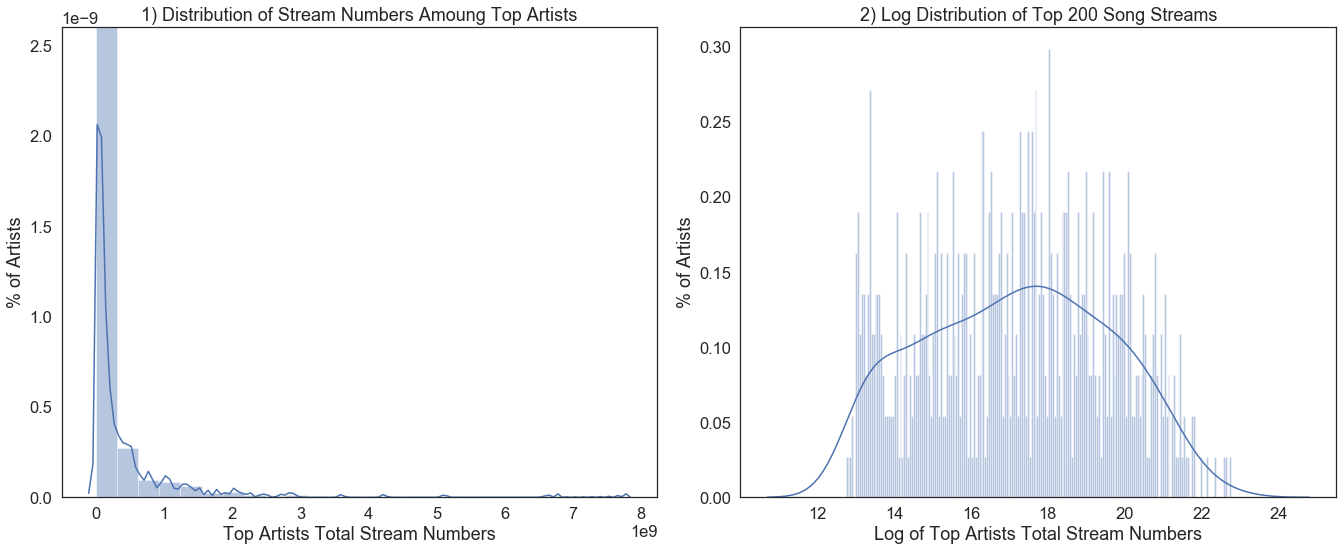

In [45]:

fig = plt.figure(figsize=(19,8))
with sns.axes_style("white"):
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

_ = sns.set(font_scale=1.5)

_ = sns.distplot(top_artists['Streams'].values, ax=ax1, bins=25, norm_hist=True)
_ =_.set(title='1) Distribution of Stream Numbers Amoung Top Artists', ylabel='% of Artists', xlabel='Top Artists Total Stream Numbers')
_ = sns.distplot(top_artists['log_streams'], ax=ax2,bins=200)
_.set(title='2) Log Distribution of Top 200 Song Streams', ylabel='% of Artists', xlabel='Log of Top Artists Total Stream Numbers')
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\dist_of_songs.png')

#### From the left graph, we see there is a rough exponential relationship between the most popular artists.
#### From the right graph, we see a gaussian distribution of stream numbers among the artists.

## 4) When do Spotify users tend to stream the most (day of week, time of year, etc.)?

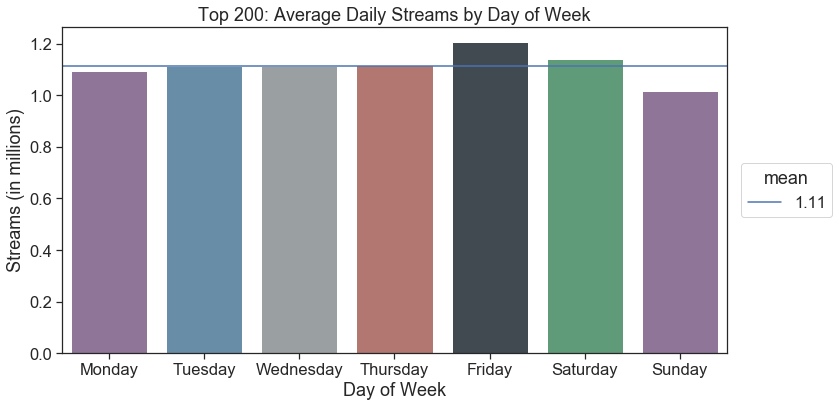

In [46]:
#resampling by day of week and plotting the results
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.set_style(style='white')
sns.set_style('ticks')
sns.set_palette(flatui, n_colors=8, desat=.5)

weekly_resample = df2['Streams'].reset_index()
weekly_resample['day_of_week'] = weekly_resample['Date'].dt.dayofweek
weekly_resample = weekly_resample.groupby('day_of_week')['Streams'].mean().reset_index()
day_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekly_resample['day_of_week'] = weekly_resample['day_of_week'].map(day_dict)
weekly_resample['Streams'] = weekly_resample['Streams'] / 1000000

_ = plt.figure(figsize=(12,6))

_ = sns.barplot(weekly_resample['day_of_week'], weekly_resample['Streams'])
_ =_.set(title='Top 200: Average Daily Streams by Day of Week', xlabel='Day of Week', ylabel='Streams (in millions)')
_ = plt.axhline(np.mean(weekly_resample['Streams']), 10,0,color='b',label=str(round(np.mean(weekly_resample['Streams']),2)))
_ = plt.legend(title='mean', loc='center right', bbox_to_anchor=(1.17, 0.5))
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\DOW_streams.png')

#### From the above graph, among the top 200 list of songs, we see that Friday and Saturday have the highest stream numbers with Sunday being the lowest.

In [47]:
monthly_resample = df2['Streams'].reset_index()
mask = (monthly_resample['Date'] >= '2017-01-01') & (monthly_resample['Date'] <= '2018-12-31')
monthly_resample = monthly_resample[mask]

In [48]:
#resampling by day of week and plotting the results
monthly_resample['month'] = monthly_resample['Date'].dt.month
monthly_resample['month'] = monthly_resample['Date'].dt.month
monthly_resample = monthly_resample.groupby('month')['Streams'].mean().reset_index()
monthly_resample['Streams'] = monthly_resample['Streams'] / 1000000
month_dict = {1:'January', 2:'February', 3:'March', 4:'April',5:'May',6:'June', 7:'July', 8:'August', 9:'September', 10:'October',11:'November',12:'December'}
monthly_resample['month'] = monthly_resample['month'].map(month_dict)
monthly_resample.head()


,month,Streams
0,January,0.982126
1,February,1.037460
2,March,1.120133
3,April,1.130071
4,May,1.118009


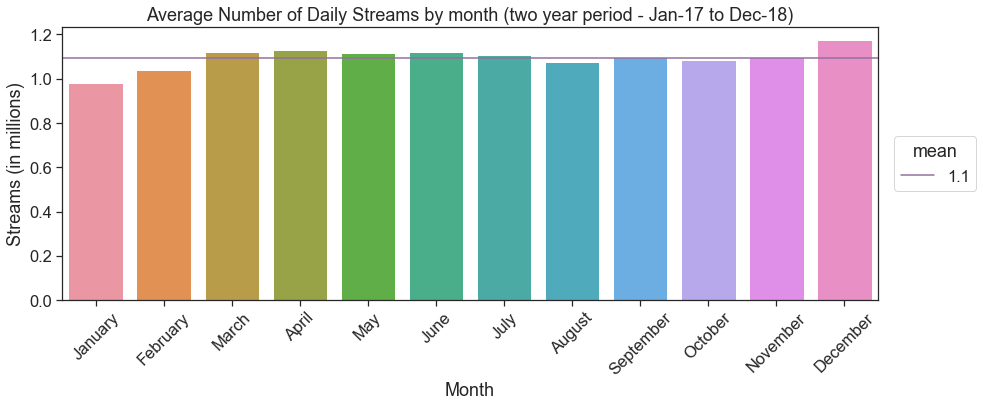

In [49]:

sns.set_palette(flatui, n_colors=8, desat=.5)
sns.set_style(style='white')
sns.set_style('ticks')

_ = plt.figure(figsize=(14,6))
_ = sns.barplot(monthly_resample['month'], monthly_resample['Streams'])
sns.set_palette(flatui, n_colors=8, desat=.5)
_ =_.set(title='Average Number of Daily Streams by month (two year period - Jan-17 to Dec-18)', xlabel='Month', ylabel='Streams (in millions)')
_ = plt.axhline(np.mean(monthly_resample['Streams']), 10,0,label=str(round(np.mean(monthly_resample['Streams']),2)))
plt.xticks(rotation=45)
_ = plt.legend(title='mean', loc='center right', bbox_to_anchor=(1.13, 0.5))
sns.set_palette(flatui, n_colors=8, desat=.5)
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\streams_by_month.png')

#### Splitting the data into monthly streams, we see that December is significantly higher than other months. While February is the lowest month. Given that Spotify's user demographic is largely younger, one could postulate that the dip in February could be due to school or exams. Additional data is required to confirm this hypothesis

## 5) Who is the most popular artist in the last 2.33 years?

In [50]:
top10_artists = top_artists.head(10)

In [51]:
top10_artists

,Artist,Streams,log_streams
544,Post Malone,7.730977e+09,22.768501
198,Ed Sheeran,6.779223e+09,22.637128
191,Drake,6.622569e+09,22.613749
710,XXXTENTACION,5.110401e+09,22.354544
45,Ariana Grande,4.220703e+09,22.163267
646,The Chainsmokers,3.598981e+09,22.003917
345,Khalid,2.911618e+09,21.791975
273,Imagine Dragons,2.851318e+09,21.771047
341,Kendrick Lamar,2.804822e+09,21.754606
115,Calvin Harris,2.699821e+09,21.716451


In [215]:
list(top10_artists.Artist)

['Post Malone',
 'Ed Sheeran',
 'Drake',
 'XXXTENTACION',
 'Ariana Grande',
 'The Chainsmokers',
 'Khalid',
 'Imagine Dragons',
 'Kendrick Lamar',
 'Calvin Harris']

In [232]:
is_featured_pivot[is_featured_pivot['Artist'].isin(list(top10_artists.Artist))].sort_values('%featured', ascending=False)

,Artist,not_featured,featured,%featured
115,Calvin Harris,400,1435,0.782016
544,Post Malone,3904,1065,0.214329
345,Khalid,1908,457,0.193235
710,XXXTENTACION,3697,730,0.164897
341,Kendrick Lamar,2015,346,0.146548
646,The Chainsmokers,3157,148,0.044781
45,Ariana Grande,2357,64,0.026435
191,Drake,4564,90,0.019338
198,Ed Sheeran,5701,4,0.000701
273,Imagine Dragons,2499,0,0.000000


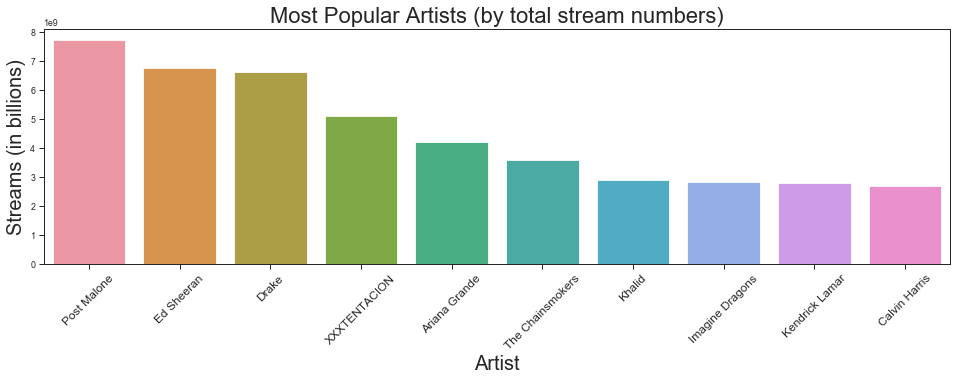

In [253]:
sns.set_style(style='white')
sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":22,"axes.labelsize":15}) 
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(top10_artists.Artist, top10_artists.Streams)
_.set(title='Most Popular Artists (by total stream numbers)' )
_.set_xlabel(xlabel='Artist',fontsize=20)
_.set_ylabel(ylabel='Streams (in billions)',fontsize=20)
plt.xticks(rotation=45, fontsize=12)
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\top_artists.png')

#### Post Malone appears to be the most popular artist in the last two years.

In [53]:
artist_group = df.groupby('Artist').agg({'Streams': ['sum','count']})
artist_group = artist_group['Streams'].rename(columns={"sum": "total_streams", 'count':'instances_in_top200'})
artist_group = artist_group.reset_index()
artist_group[artist_group.Artist == 'Post Malone']

,Artist,total_streams,instances_in_top200
544,Post Malone,7.730977e+09,4969


In [54]:
placeholder = df.drop_duplicates(keep = False)
placeholder['is_featured'] = placeholder['is_featured'] * 1
placeholder = placeholder.groupby(['Track Name', 'Artist']).agg({'is_featured':'count'})
placeholder = placeholder.sort_values('Track Name', ascending=False).reset_index()
#print (placeholder[placeholder.Artist == 'Post Malone'])

In [55]:
top_song = df.groupby(['Track Name','Artist']).sum().sort_values('Streams', ascending=False).reset_index()

In [56]:
top_song = top_song.head(5)
top_song.head()

,Track Name,Artist,Streams
0,Shape of You,Ed Sheeran,2.090274e+09
1,God's Plan,Drake,1.243688e+09
2,New Rules,Dua Lipa,1.102638e+09
3,Perfect,Ed Sheeran,1.062269e+09
4,Despacito - Remix,Luis Fonsi,1.036822e+09


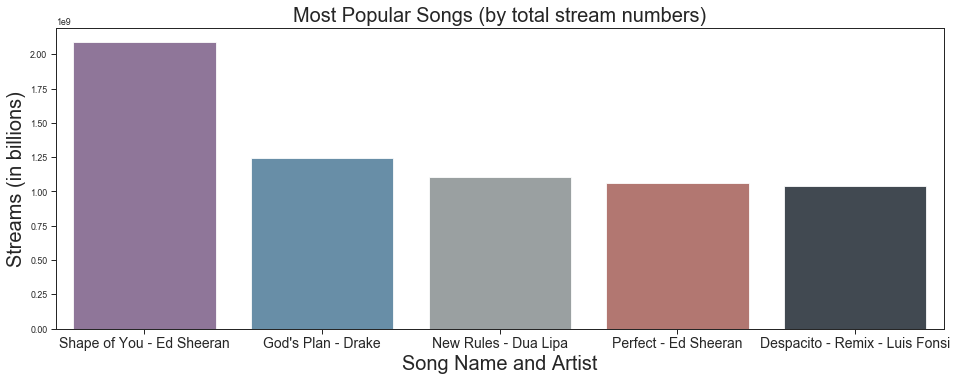

In [251]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":22}) 
sns.set_style(style='white')
sns.set_style('ticks')
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(top_song['Track Name'] + ' - ' + top_song['Artist'], top_song.Streams)
_.set(title='Most Popular Songs (by total stream numbers)')
_.set_xlabel(xlabel='Song Name and Artist',fontsize=20)
_.set_ylabel( ylabel='Streams (in billions)',fontsize=20)
plt.xticks(fontsize=14)
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\top_songs.png')

#### Shape of You - Ed Sheeran holds the title for most popular song.

## 6) What types of genres tend to be on the top 200 charts?

In [58]:
#IMPORTANT - URL for songs is too long, an adjustment to pandas settings is required
pd.set_option("display.max_colwidth", 10000)

#grabbing API keys from hidden file
CLIENT_ID, SECRET_CLIENT_ID = grab_api_keys()

In [59]:
credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=SECRET_CLIENT_ID)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [60]:
cwd = os.getcwd()
print (cwd)

C:\Users\abels\Desktop\spotify_scrape


In [61]:
top_200 = pd.read_csv(cwd + r'\Data_Wrangling\final_csv_files\Combined_Top_200_Stream_Numbers.csv')

In [62]:
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')
mask = (~np.isnan(df['Streams']))
df = df[mask]

In [63]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,is_featured
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrkmtKl66Z,2017-01-01,False
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw,2017-01-01,False
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ3Fk945m,2017-01-01,False
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF5yJsuaW,2017-01-01,True
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3,2017-01-01,False


In [64]:
unique_artists = df['Artist'].drop_duplicates().to_frame()

In [65]:
unique_artists.head()

,Artist
1,The Weeknd
2,The Chainsmokers
3,DJ Snake
4,Clean Bandit
5,Drake


In [66]:
unique_artists['api_artist'] = ""

In [67]:
unique_artists['api_url'] = ""

In [68]:
unique_artists = unique_artists.reset_index()
unique_artists = unique_artists.drop('index', axis=1)
unique_artists.head()

,Artist,api_artist,api_url
0,The Weeknd,,
1,The Chainsmokers,,
2,DJ Snake,,
3,Clean Bandit,,
4,Drake,,


In [69]:
for x in range(len(unique_artists)):
    placeholder = spotify.search(unique_artists.iloc[x][0])
    if len(placeholder['tracks']['items']) != 0:
        try:
            for counter in range(len(placeholder['tracks']['items'])):
                if unique_artists.iloc[x][0] == placeholder['tracks']['items'][counter]['album']['artists'][0]['name']:
                    unique_artists.at[x,'api_artist'] = placeholder['tracks']['items'][counter]['album']['artists'][0]['name']
                    unique_artists.at[x,'api_url'] = placeholder['tracks']['items'][counter]['album']['artists'][0]['external_urls']['spotify']
        except:
            print (placeholder)
          

In [70]:
unique_artists.head()

,Artist,api_artist,api_url
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4


In [71]:
unique_artists[unique_artists['Artist'] != unique_artists['api_artist']].head()

,Artist,api_artist,api_url
45,Justin Bieber,,
166,La La Land Cast,,
175,Anuel Aa,,
180,Emma Stone,,
184,Grey,,


In [72]:
unique_artists['artist_api_id'] = unique_artists['api_url'].str[32:1000]
unique_artists['genres'] = np.NaN
unique_artists['genres'].astype('object')
unique_artists.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,NaN
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,NaN
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,NaN
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,NaN
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,NaN


In [73]:
unique_artists.shape

(736, 5)

In [74]:
genre_df = unique_artists
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,NaN
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,NaN
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,NaN
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,NaN
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,NaN


In [75]:
genre_df.shape

(736, 5)

In [76]:
genre_df[genre_df['api_url'] == ''].head()

,Artist,api_artist,api_url,artist_api_id,genres
45,Justin Bieber,,,,NaN
166,La La Land Cast,,,,NaN
175,Anuel Aa,,,,NaN
180,Emma Stone,,,,NaN
184,Grey,,,,NaN


In [77]:
spotify.artist(genre_df.iloc[1]['artist_api_id'])

{'external_urls': {'spotify': 'https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp'},
 'followers': {'href': None, 'total': 13737259},
 'genres': ['edm', 'electropop', 'pop', 'tropical house'],
 'href': 'https://api.spotify.com/v1/artists/69GGBxA162lTqCwzJG5jLp',
 'id': '69GGBxA162lTqCwzJG5jLp',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/960547a625bc2eb742bb3dd170cbc049d2e94cf9',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/9da714082fe9696529abadc8e4095451221b4483',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/caca64268346846a0753ca894b6ff92bb4dfb864',
   'width': 160}],
 'name': 'The Chainsmokers',
 'popularity': 89,
 'type': 'artist',
 'uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp'}

In [78]:
genre_df['artist_api_id'].head()

0    1Xyo4u8uXC1ZmMpatF05PJ
1    69GGBxA162lTqCwzJG5jLp
2    540vIaP2JwjQb9dm3aArA4
3    6MDME20pz9RveH9rEXvrOM
4    3TVXtAsR1Inumwj472S9r4
Name: artist_api_id, dtype: object

In [79]:
unique_artists['genres'] = unique_artists['genres'].astype('object')

In [80]:
for x in range(1):
    placeholder = spotify.artist(genre_df.iloc[x]['artist_api_id'])
    try:
        genre_df.at[x,'genres'] = placeholder['genres']
    except:
        genre_df.at[x,'genres'] = 'error'

In [81]:
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,"[canadian contemporary r&b, canadian pop, pop, rap]"
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,NaN
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,NaN
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,NaN
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,NaN


In [82]:
for x in range(len(genre_df)):
    if genre_df.iloc[x]['artist_api_id'] != '':
        placeholder = spotify.artist(genre_df.iloc[x]['artist_api_id'])
        try:
            genre_df.at[x,'genres'] = placeholder['genres']
        except:
            genre_df.at[x,'genres'] = 'error'

In [83]:
genre_df[genre_df['genres']=='error'].head()

,Artist,api_artist,api_url,artist_api_id,genres


In [84]:
genre_df[genre_df['genres'].str.len() == 0].head()

,Artist,api_artist,api_url,artist_api_id,genres
37,Nevada,Nevada,https://open.spotify.com/artist/15NtJjjHRFybdNSMyM9smT,15NtJjjHRFybdNSMyM9smT,[]
55,Zay Hilfigerrr,Zay Hilfigerrr,https://open.spotify.com/artist/7nKeLE1toRtW4M279iS26h,7nKeLE1toRtW4M279iS26h,[]
135,MiC LOWRY,MiC LOWRY,https://open.spotify.com/artist/0AJUYWKztkg5dnrHDIBv47,0AJUYWKztkg5dnrHDIBv47,[]
164,Stanaj,Stanaj,https://open.spotify.com/artist/3zrUX1hQrUB9aXcOiyQLmN,3zrUX1hQrUB9aXcOiyQLmN,[]
323,DJ Jonathan,DJ Jonathan,https://open.spotify.com/artist/5RSYz1KaYXbHfKdlaxAI8O,5RSYz1KaYXbHfKdlaxAI8O,[]


In [85]:
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,"[canadian contemporary r&b, canadian pop, pop, rap]"
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,"[edm, electropop, pop, tropical house]"
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,[electronic trap]
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,"[dance pop, edm, pop, post-teen pop, tropical house, uk dance, uk funky]"
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop rap, rap, toronto rap]"


In [86]:
len(genre_df.iloc[706]['genres'])

1

In [87]:
genre_df.iloc[706]['genres']

['k-pop']

In [88]:
genre_df.head()

,Artist,api_artist,api_url,artist_api_id,genres
0,The Weeknd,The Weeknd,https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ,1Xyo4u8uXC1ZmMpatF05PJ,"[canadian contemporary r&b, canadian pop, pop, rap]"
1,The Chainsmokers,The Chainsmokers,https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp,69GGBxA162lTqCwzJG5jLp,"[edm, electropop, pop, tropical house]"
2,DJ Snake,DJ Snake,https://open.spotify.com/artist/540vIaP2JwjQb9dm3aArA4,540vIaP2JwjQb9dm3aArA4,[electronic trap]
3,Clean Bandit,Clean Bandit,https://open.spotify.com/artist/6MDME20pz9RveH9rEXvrOM,6MDME20pz9RveH9rEXvrOM,"[dance pop, edm, pop, post-teen pop, tropical house, uk dance, uk funky]"
4,Drake,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4,3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop rap, rap, toronto rap]"


In [89]:
unique_genres = genre_df['genres'].reset_index()

In [90]:
print(unique_genres.iloc[706])

index         706
genres    [k-pop]
Name: 706, dtype: object


In [91]:
print (type(unique_genres.iloc[706]))

<class 'pandas.core.series.Series'>


In [92]:
len(unique_genres)

736

In [93]:
type(unique_genres.iloc[44]['genres'])

list

In [94]:
placeholder_list = []
for x in range(len(unique_genres)):
    if type(unique_genres.iloc[x]['genres']) != float:
        print (x)
        placeholder_list.extend(unique_genres.iloc[x]['genres'])
        print (unique_genres.iloc[x]['genres'])

0
['canadian contemporary r&b', 'canadian pop', 'pop', 'rap']
1
['edm', 'electropop', 'pop', 'tropical house']
2
['electronic trap']
3
['dance pop', 'edm', 'pop', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky']
4
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
5
['dance pop', 'pop', 'post-teen pop']
6
['pop']
7
['hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
8
['colombian pop', 'dance pop', 'latin', 'latin pop', 'mexican pop', 'pop']
9
['dance pop', 'pop', 'post-teen pop']
10
['dance pop', 'pop', 'post-teen pop', 'talent show']
11
['atl hip hop', 'pop', 'pop rap', 'rap', 'trap music']
12
['dance pop', 'edm', 'electro house', 'moombahton', 'pop', 'tropical house']
13
['big room', 'edm', 'pop', 'progressive house', 'tropical house']
14
['dance pop', 'pop', 'post-teen pop']
15
['aussietronica']
16
['dance pop', 'pop', 'pop rap']
17
['canadian pop', 'dance pop', 'pop', 'viral pop']
18
['big room', 'dance pop', 'edm', 'elect

['latin', 'latin hip hop', 'reggaeton', 'tropical']
158
['dance pop', 'edm', 'house', 'pop', 'tropical house', 'uk dance']
159
['edm', 'electropop', 'indie poptimism', 'modern rock', 'pop', 'tropical house']
160
['dance pop', 'electropop', 'etherpop', 'indie poptimism', 'pop', 'post-teen pop']
161
['big room', 'brostep', 'dance pop', 'edm', 'electro house', 'house', 'pop', 'trance', 'tropical house']
162
['dance pop', 'latin', 'latin pop', 'pop', 'tropical']
163
['dance pop', 'pop', 'post-teen pop', 'viral pop']
164
[]
165
['dance pop', 'pop']
167
['hollywood']
168
['dance pop', 'pop', 'post-teen pop']
169
['hip hop', 'pop', 'pop rap', 'rap', 'trap music']
170
['atl hip hop', 'dirty south rap', 'hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
171
['britpop', 'madchester', 'permanent wave', 'rock']
172
['neo mellow', 'pop', 'pop rock', 'singer-songwriter']
173
['rap', 'trap music', 'underground hip hop', 'vapor trap']
174
['modern rock', 'rock']
176
['hip hop', 'pop

331
['latin', 'latin hip hop', 'latin pop', 'pop', 'reggaeton', 'reggaeton flow', 'tropical']
332
['australian pop', 'dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'talent show']
333
['irish rock', 'permanent wave', 'rock']
334
['emo rap', 'miami hip hop', 'trap music']
335
['latin', 'rap latina', 'reggaeton', 'tropical']
336
['dance pop', 'latin', 'latin hip hop', 'latin pop', 'pop', 'pop reggaeton', 'reggaeton', 'tropical']
337
['electropop', 'indie poptimism', 'pop', 'swedish electropop', 'swedish pop', 'swedish synthpop']
338
['latin', 'latin arena pop', 'latin pop', 'mexican pop', 'pop']
339
['hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap music', 'underground hip hop']
340
['disco', 'funk', 'jazz funk', 'motown', 'quiet storm', 'soul']
341
['big room', 'dutch house', 'edm', 'electro house', 'pop', 'progressive electro house', 'tropical house']
343
['french hip hop', 'trap francais']
344
['german hip hop']
345
['album rock', 'classic rock', 'folk rock

513
['sertanejo', 'sertanejo universitario']
514
['funk carioca', 'funk ostentacao']
515
['bachata', 'latin', 'latin pop', 'tropical']
516
['electropop', 'pop']
517
['italian hip hop']
518
['dance pop', 'edm', 'norwegian pop', 'pop', 'pop edm', 'tropical house']
519
['big room', 'edm', 'progressive electro house']
520
['basshall']
521
['country']
522
['german hip hop']
523
['deep german hip hop', 'german hip hop', 'hamburg hip hop']
524
['baile pop', 'funk carioca', 'funk ostentacao']
525
['baile pop', 'funk carioca', 'funk ostentacao']
526
['argentine hip hop', 'trap argentino', 'trap latino']
527
['italian hip hop']
528
['australian pop', 'dance pop', 'europop', 'pop', 'post-teen pop']
529
['dance pop', 'pop', 'post-teen pop', 'tropical house', 'uk pop']
530
['italian arena pop', 'italian hip hop', 'italian pop']
531
['latin pop']
532
['garage rock', 'indie rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
533
['italian alternative', 'italian hip hop', 'trap italiana

['latin pop', 'reggaeton chileno', 'trap chileno']
719
['german hip hop']
720
['lithuanian electronic']
722
['alternative metal', 'german metal', 'industrial', 'industrial metal', 'industrial rock', 'neue deutsche harte', 'nu metal']
723
['latin', 'reggaeton flow', 'tropical']
724
['conscious hip hop', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap music']
725
['bachata', 'latin', 'latin hip hop', 'latin pop', 'tropical']
726
['albanian hip hop', 'german hip hop']
727
['panamanian pop']
728
['reggaeton flow']
729
['pop house']
730
['chicago rap']
731
['dance pop']
732
['j-pop girl group', 'k-pop', 'k-pop girl group']
733
['escape room', 'minnesota hip hop', 'pop', 'trap queen']
734
['nc hip hop', 'rap']
735
['lo-fi beats']


In [95]:
placeholder_list = list(set(placeholder_list))

In [96]:
placeholder_list

['italian hip hop',
 'cowboy western',
 'new french touch',
 'italian alternative',
 'indie folk',
 'dance pop',
 'detroit trap',
 'r&b',
 'pittsburgh rap',
 'uk metalcore',
 'yodeling',
 'glam rock',
 'hard rock',
 'belgian edm',
 'ballroom',
 'mellow gold',
 'bmore',
 'vocal jazz',
 'complextro',
 'hawaiian hip hop',
 'hip pop',
 'heartland rock',
 'australian pop',
 'trap latino',
 'rap rock',
 'gospel r&b',
 'shiver pop',
 'lgbtq+ hip hop',
 'sheffield indie',
 'album rock',
 'electropowerpop',
 'swedish idol pop',
 'deep pop edm',
 'danish electronic',
 'bow pop',
 'indie rock',
 'trap chileno',
 'anthem worship',
 'new americana',
 'underground hip hop',
 'indie pop rap',
 'pop punk',
 'albanian hip hop',
 'slow core',
 'art pop',
 'brega romantico',
 'neo mellow',
 'funk rock',
 'bass trap',
 'dutch house',
 'broadway',
 'italian underground hip hop',
 'neo-psychedelic',
 'christian alternative rock',
 'disco house',
 'bubblegum pop',
 'uk pop',
 'reggaeton',
 'rap dominicano',


In [97]:
len(placeholder_list)

417

In [98]:
d = defaultdict(int)
for x in range(len(unique_genres)):
    if type(unique_genres.iloc[x]['genres']) != float:
        for genre in unique_genres.iloc[x]['genres']:
            d[genre] +=1

In [99]:
result = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
print (result)

[('pop', 266), ('dance pop', 158), ('rap', 106), ('pop rap', 102), ('post-teen pop', 82), ('trap music', 76), ('hip hop', 68), ('tropical house', 63), ('edm', 55), ('latin', 48), ('rock', 45), ('electropop', 40), ('southern hip hop', 39), ('tropical', 38), ('latin pop', 32), ('modern rock', 29), ('reggaeton', 27), ('electro house', 25), ('mellow gold', 23), ('german hip hop', 22), ('underground hip hop', 21), ('adult standards', 21), ('reggaeton flow', 20), ('funk carioca', 20), ('soft rock', 20), ('atl hip hop', 18), ('indie poptimism', 18), ('australian pop', 17), ('neo mellow', 17), ('r&b', 17), ('latin hip hop', 17), ('pop rock', 17), ('big room', 16), ('permanent wave', 16), ('album rock', 16), ('lounge', 16), ('viral pop', 15), ('vocal jazz', 15), ('uk pop', 14), ('classic rock', 14), ('urban contemporary', 13), ('vapor trap', 12), ('europop', 12), ('swedish pop', 11), ('trap latino', 11), ('italian hip hop', 11), ('conscious hip hop', 10), ('pop edm', 10), ('gangster rap', 10), 

In [100]:
import matplotlib.pyplot as plt

In [101]:
from collections import Counter

In [102]:
scores = Counter(result)
scores = scores.most_common(10)

In [103]:
popular = result

In [104]:
print (scores)

[(('pop', 266), 1), (('dance pop', 158), 1), (('rap', 106), 1), (('pop rap', 102), 1), (('post-teen pop', 82), 1), (('trap music', 76), 1), (('hip hop', 68), 1), (('tropical house', 63), 1), (('edm', 55), 1), (('latin', 48), 1)]


In [105]:
x,y = zip(*scores)
x,y = zip(*x)

In [106]:
print (x,y)

('pop', 'dance pop', 'rap', 'pop rap', 'post-teen pop', 'trap music', 'hip hop', 'tropical house', 'edm', 'latin') (266, 158, 106, 102, 82, 76, 68, 63, 55, 48)


[Text(0, 0.5, 'count of genre'),
 Text(0.5, 0, 'Genres'),
 Text(0.5, 1.0, 'Top 200 genre count (top 10 genres)')]

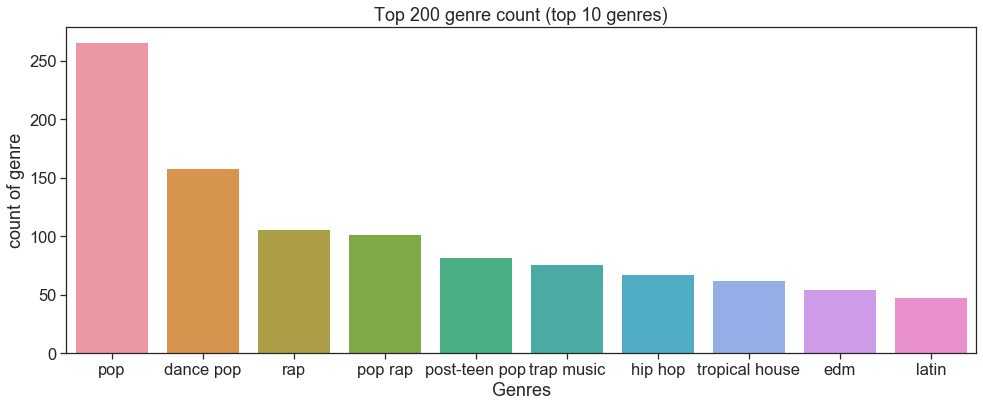

In [107]:
sns.set_style(style='white')
sns.set_style('ticks')
plt.figure(figsize = (14,6))
_ = sns.barplot(list(x),y)
_.set(title='Top 200 genre count (top 10 genres)', xlabel='Genres', ylabel='count of genre')

In [108]:
_.figure.savefig(r'C:\Users\abels\Desktop\spotify_scrape\Data Story\graphics\genre_count.png')

In [109]:
dict_score = dict(scores)

In [110]:
dict_score

{('pop', 266): 1,
 ('dance pop', 158): 1,
 ('rap', 106): 1,
 ('pop rap', 102): 1,
 ('post-teen pop', 82): 1,
 ('trap music', 76): 1,
 ('hip hop', 68): 1,
 ('tropical house', 63): 1,
 ('edm', 55): 1,
 ('latin', 48): 1}